In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from datasets import load_dataset
import seaborn as sns
sns.set_style("white")

In [2]:
from create_models import *
train_df, val_df, test_df = make_base_dataset()

Found cached dataset humicroedit (/home/gabriel/.cache/huggingface/datasets/humicroedit/subtask-1/0.0.0/209c209bc70671d8d939aefd82e51f8ff294e47504ec64ef653a93a1f13e9ed3)


  0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
df = train_df
combined_df = pd.concat([train_df, val_df, test_df])

In [5]:
agreement_names = ['All Agree', 'One Disagreement', 'Two Disagreements', 'Three Disagreements']

def deconstruct_by_agreeableness(df):
    df_all_agree = df[df['disagreements'] == 0]
    df_one_disagree = df[df['disagreements'] == 1]
    df_two_disagree = df[df['disagreements'] == 2]
    df_three_disagree = df[df['disagreements'] == 3]
    assert len(df_all_agree.index) + len(df_one_disagree.index) + len(df_two_disagree.index) + len(df_three_disagree.index) == len(df.index)
    return df_all_agree, df_one_disagree, df_two_disagree, df_three_disagree

df_all_agree, df_one_disagree, df_two_disagree, df_three_disagree = deconstruct_by_agreeableness(df)

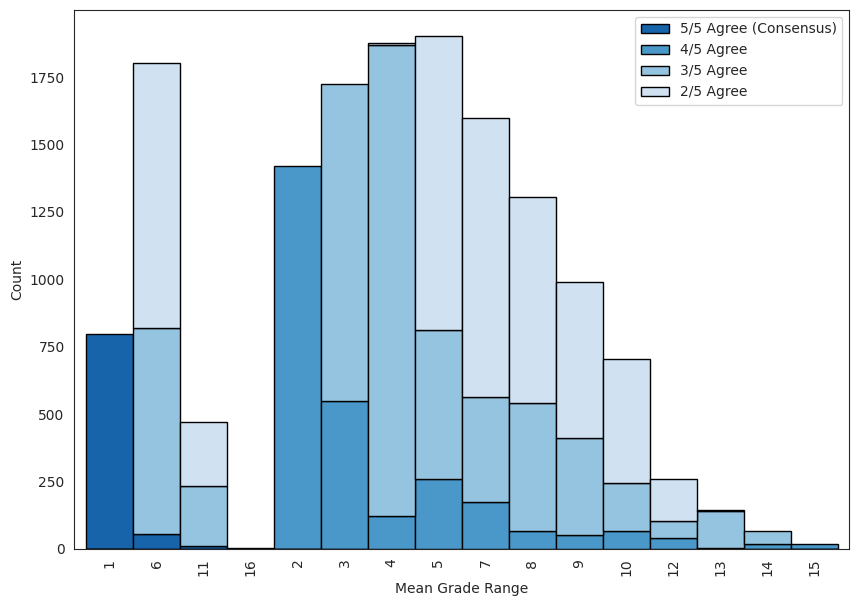

In [27]:
dfs = deconstruct_by_agreeableness(combined_df)

bins = np.linspace(0, 3, 17)  # 16 bins between 0 and 3
dfs_mod = []

for df in dfs:
    df_copy = df.copy()  # Copy the DataFrame to avoid SettingWithCopyWarning
    df_copy['mean_grade_bucket'] = pd.cut(df_copy['meanGrade'], bins, labels=False, include_lowest=True) + 1
    dfs_mod.append(df_copy)

grade_counts = [df['mean_grade_bucket'].value_counts(normalize=False).sort_index() for df in dfs_mod]

grade_counts_df = pd.DataFrame(grade_counts).T
grade_counts_df.columns = ["5/5 Agree (Consensus)", "4/5 Agree", "3/5 Agree", "2/5 Agree"]

grade_counts_df.plot(kind='bar', stacked=True, figsize=(10, 7), width=1.0, edgecolor='black', color=sns.color_palette("Blues", n_colors=4)[::-1])
plt.xlabel('Mean Grade Range')
plt.ylabel('Count')
#plt.xticks(ticks=range(14), labels=["{0:.1f}-{1:.1f}".format(bins[i], bins[i+1]) for i in range(14)], rotation=45)
plt.show()

/tmp/ipykernel_22246/2903546950.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rmse_baseline = np.sqrt(loaded_df.groupby(['mean_grade_bucket']).mean().reset_index()['baseline_regression_score_mse'].mean())
/tmp/ipykernel_22246/2903546950.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rmse_cleaned  = np.sqrt(loaded_df.groupby(['mean_grade_bucket']).mean().reset_index()['cleaned_regression_score_mse'].mean())
/tmp/ipykernel_22246/2903546950.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default 

[< Q1 removed] total RMSE, baseline: 0.8266012614755536
[< Q1 removed] total RMSE, cleaned:  0.799363487200129
[< Q1 removed] t test for mae, bottom 5% 3.5809991503460336e-28
[< Q1 removed] t test for mse, bottom 5% 9.749309141097871e-23
[< Q1 removed] t test for mae, bottom 10% 3.238010645564481e-32
[< Q1 removed] t test for mse, bottom 10% 2.608213393763088e-19
[< Q1 removed] t test for mae, below Q1 8.439106367848548e-55
[< Q1 removed] t test for mse, below Q1 1.2330102893967411e-37
[< Q1 removed] t test for mae, between Q1 and Q3 2.3641422654831567e-09
[< Q1 removed] t test for mse, between Q1 and Q3 1.3497777603721179e-06
[< Q1 removed] t test for mae, above Q3 9.967658295844885e-07
[< Q1 removed] t test for mse, above Q3 1.5753434176788983e-08
[< Q1 removed] t test for mae, entire dataset 1.3820283732459584e-14
[< Q1 removed] t test for mse, entire dataset 3.214692360218388e-10
[< Q1 removed] t test for regression, below Q1 1.2217991473514502e-57
[< Q1 removed] t test for regress

/tmp/ipykernel_22246/2903546950.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dff_mse = dff.groupby(['mean_grade_bucket', 'regression_type']).mean().reset_index()
/tmp/ipykernel_22246/2903546950.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rmse_baseline = np.sqrt(loaded_df.groupby(['mean_grade_bucket']).mean().reset_index()['baseline_regression_score_mse'].mean())
/tmp/ipykernel_22246/2903546950.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

[Q1 - Q3 removed] t test for mae, bottom 5% 0.0045600423329762736
[Q1 - Q3 removed] t test for mse, bottom 5% 0.9203781475879693
[Q1 - Q3 removed] t test for mae, bottom 10% 0.6275000038557353
[Q1 - Q3 removed] t test for mse, bottom 10% 0.0002210438227512549
[Q1 - Q3 removed] t test for mae, below Q1 0.23106845199031886
[Q1 - Q3 removed] t test for mse, below Q1 0.002186458985721789
[Q1 - Q3 removed] t test for mae, between Q1 and Q3 2.2955489897835767e-109
[Q1 - Q3 removed] t test for mse, between Q1 and Q3 8.050131432164421e-97
[Q1 - Q3 removed] t test for mae, above Q3 0.0007553808007719393
[Q1 - Q3 removed] t test for mse, above Q3 0.5141406346689558
[Q1 - Q3 removed] t test for mae, entire dataset 1.0047763731119737e-45
[Q1 - Q3 removed] t test for mse, entire dataset 3.8518507858072276e-53
[Q1 - Q3 removed] t test for regression, below Q1 0.03199554575258289
[Q1 - Q3 removed] t test for regression, between Q1 and Q3 5.742495407372944e-07
[Q1 - Q3 removed] t test for regression, 

/tmp/ipykernel_22246/2903546950.py:148: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/tmp/ipykernel_22246/2903546950.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


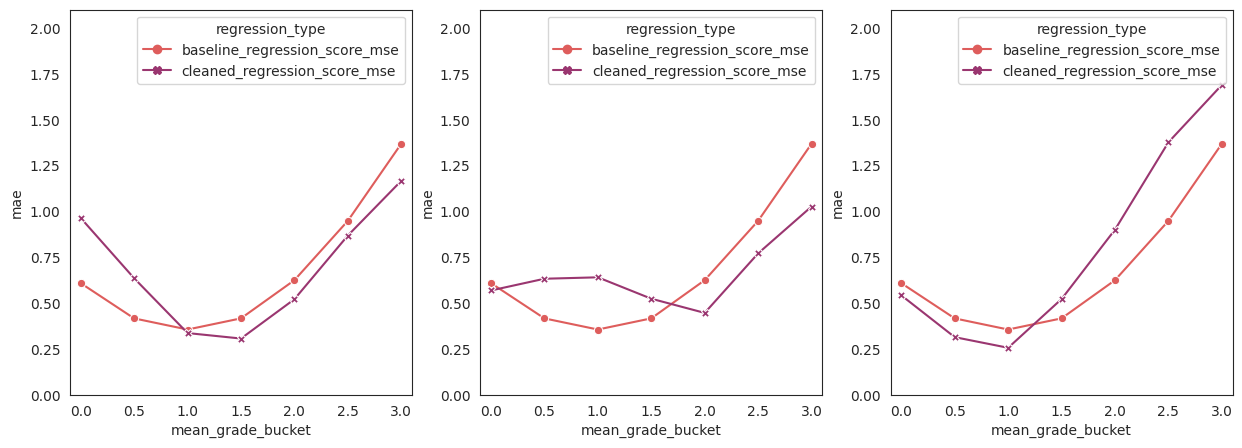

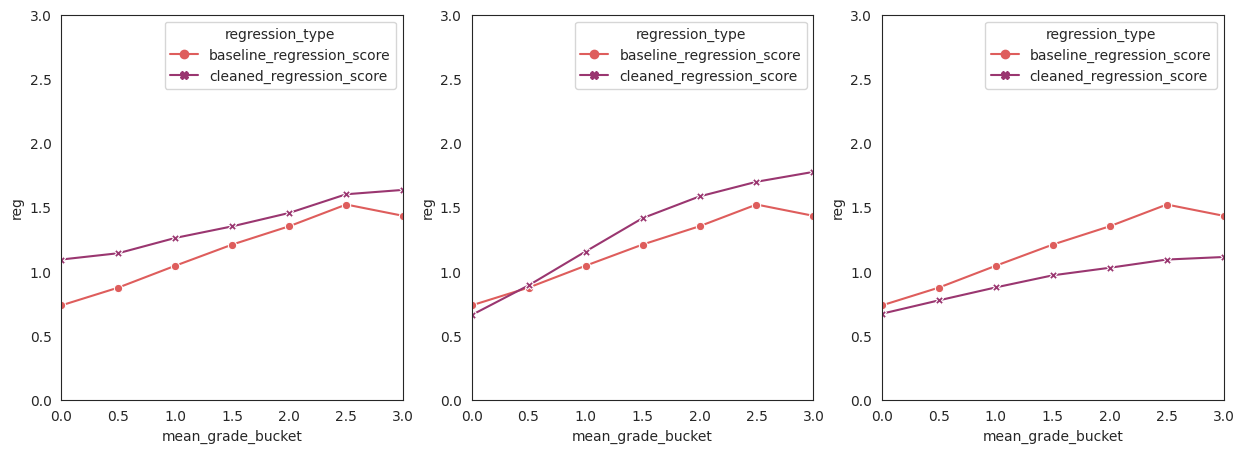

In [23]:
from scipy import stats

def round_to(n, fraction):
    return round(n / fraction) * fraction

def load_and_plot_df(ax1, ax2, path, label, mae_results, mse_results, reg_results):
    loaded_df = pd.read_pickle(path)

    loaded_df['mean_grade_bucket'] = loaded_df['meanGrade'].apply(lambda x: round_to(x, 0.5))

    loaded_df['baseline_regression_score_mse'] = loaded_df.apply(lambda row: ((row['baseline_regression_score']*3 - row["meanGrade"])**2) , axis=1)
    loaded_df['cleaned_regression_score_mse']  = loaded_df.apply(lambda row: ((row['cleaned_regression_score'] *3 - row["meanGrade"])**2) , axis=1)

    average_rmse_baseline = np.sqrt(loaded_df.groupby(['mean_grade_bucket']).mean().reset_index()['baseline_regression_score_mse'].mean())
    average_rmse_cleaned  = np.sqrt(loaded_df.groupby(['mean_grade_bucket']).mean().reset_index()['cleaned_regression_score_mse'].mean())
    
    print(f"[{label}] total RMSE, baseline:", average_rmse_baseline)
    print(f"[{label}] total RMSE, cleaned: ", average_rmse_cleaned)
    
    def draw1():
        dff = loaded_df.melt(
            id_vars=['id', 'meanGrade', 'mean_grade_bucket'], 
            value_vars=[
                'baseline_regression_score_mse', 
                'cleaned_regression_score_mse', 
            ],
            var_name='regression_type', 
            value_name='mse'
        )

        dff['mae'] = dff.apply(lambda row: np.sqrt(row['mse']), axis=1)

        dff_mse = dff.groupby(['mean_grade_bucket', 'regression_type']).mean().reset_index()
        dff_mse['rmse'] = dff_mse.apply(lambda row: np.sqrt(row['mse']), axis=1)

        # print("PEARSON", dff.groupby(['regression_type']).corr()['rmse'])

        tests = [
            (dff[dff['meanGrade'] == dff['meanGrade'].quantile(0.05)], "bottom 5%"),
            (dff[dff['meanGrade'] == dff['meanGrade'].quantile(0.1)], "bottom 10%"),
            (dff[dff['meanGrade'] <= 0.4], "below Q1"),
            (dff[(dff['meanGrade'] >= 0.4) & (dff['meanGrade'] <= 1.4)], "between Q1 and Q3"),
            (dff[dff['meanGrade'] >= 1.4], "above Q3"),
            (dff, "entire dataset")
        ]
        for dfx, segment_name in tests:
            dfx1 = dfx[dfx['regression_type'] == 'baseline_regression_score_mse']
            dfx2 = dfx[dfx['regression_type'] == 'cleaned_regression_score_mse']

            pval = stats.ttest_ind(dfx1['mae'].to_numpy(), dfx2['mae'].to_numpy()).pvalue
            print(f"[{label}] t test for mae, {segment_name}", pval)

            mae_results.append({
                "model": label,
                "segment": segment_name,
                "pval": pval,
                "significant": pval < 0.05,
                "mae_baseline": dfx1['mae'].mean(),
                "mae_cleaned":  dfx2['mae'].mean(),
            })

            pval = stats.ttest_ind(dfx1['mse'].to_numpy(), dfx2['mse'].to_numpy()).pvalue
            print(f"[{label}] t test for mse, {segment_name}", pval)            
            mse_results.append({
                "model": label,
                "segment": segment_name,
                "pval": pval,
                "significant": pval < 0.05,
                "mse_baseline": dfx1['mse'].mean(),
                "mse_cleaned":  dfx2['mse'].mean(),
            })

        sns.lineplot(x='mean_grade_bucket', y='mae', hue='regression_type', palette='flare', data=dff, style='regression_type', errorbar=None, markers=True, dashes=False, ax=ax1)
        
        if False: # extra plot for paper, RMSE instead of MSE
            dff_mse = dff.groupby(['mean_grade_bucket', 'regression_type']).mean().reset_index()
            dff_mse['rmse'] = dff_mse.apply(lambda row: np.sqrt(row['mse']), axis=1)
            display_copy = dff_mse.copy().rename(columns={
                'baseline_regression_score_mse': 'Baseline',
                'cleaned_regression_score_mse': 'NoMiddle50',
                'mean_grade_bucket': 'Mean Grade',
                'mse': 'MSE',
                'rmse': 'RMSE',
                'regression_type': 'Model',
            })
            display_copy['Model'].replace('baseline_regression_score_mse', 'Baseline', inplace=True)
            display_copy['Model'].replace('cleaned_regression_score_mse', 'NoMiddle50', inplace=True)

            sns.lineplot(x='Mean Grade', y='RMSE', hue='Model', palette='flare', data=display_copy, style='Model', errorbar=None, markers=True, dashes=False)
            plt.show()
        

    def draw2():
        dff = loaded_df.melt(
            id_vars=['id', 'meanGrade', 'mean_grade_bucket'], 
            value_vars=[
                'baseline_regression_score', 
                'cleaned_regression_score', 
            ],
            var_name='regression_type', 
            value_name='reg'
        )
        dff['reg'] *= 3

        tests = [
            (dff[dff['meanGrade'] <= 0.4], "below Q1"),
            (dff[(dff['meanGrade'] >= 0.4) & (dff['meanGrade'] <= 1.4)], "between Q1 and Q3"),
            (dff[dff['meanGrade'] >= 1.4], "above Q3"),
        ]
        for dfx, segment_name in tests:
            dfx1 = dfx[dfx['regression_type'] == 'baseline_regression_score']
            dfx2 = dfx[dfx['regression_type'] == 'cleaned_regression_score']
            pval = stats.ttest_ind(dfx1['reg'].to_numpy(), dfx2['reg'].to_numpy()).pvalue
            print(f"[{label}] t test for regression, {segment_name}", pval)
            reg_results.append({
                "model": label,
                "segment": segment_name,
                "pval": pval,
                "significant": pval < 0.05,
                "reg_baseline": dfx1['reg'].mean(),
                "reg_cleaned":  dfx2['reg'].mean(),
            })

        sns.lineplot(x='mean_grade_bucket', y='reg', hue='regression_type', palette='flare', data=dff, style='regression_type', errorbar=None, markers=True, dashes=False, ax=ax2)
        
    draw1()
    draw2()

fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig2, axes2 = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

mae_results = []
mse_results = []
reg_results = []
load_and_plot_df(axes1[0], axes2[0], "df_subset_1.pkl", "< Q1 removed", mae_results, mse_results, reg_results)
load_and_plot_df(axes1[1], axes2[1], "df_subset_2.pkl", "Q1 - Q3 removed", mae_results, mse_results, reg_results)
load_and_plot_df(axes1[2], axes2[2], "df_subset_3.pkl", "> Q3 removed", mae_results, mse_results, reg_results)

for ax in axes1:
    ax.set_xlim([0-0.1, 3+0.1])
    ax.set_ylim([0, 2+0.1])
for ax in axes2:
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])

fig1.show()
fig2.show()

pd.DataFrame(mse_results).to_excel("mse_results.xlsx")
pd.DataFrame(mae_results).to_excel("mae_results.xlsx")